<a href="https://colab.research.google.com/github/dhanushreddy101/applied-datascience-1/blob/main/Dhanush%20reddy%20kankanala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Load Iris dataset from sklearn.datasets
from sklearn.datasets import load_iris

df = pd.read_csv('/content/Iris.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
print("Total number of missing values")
print(30 * "-")
print(df.isna().sum())
print(30 * "-")
print("Total missing values are:", df.isna().sum().sum())
print(30 * "-")

Total number of missing values
------------------------------
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
------------------------------
Total missing values are: 0
------------------------------


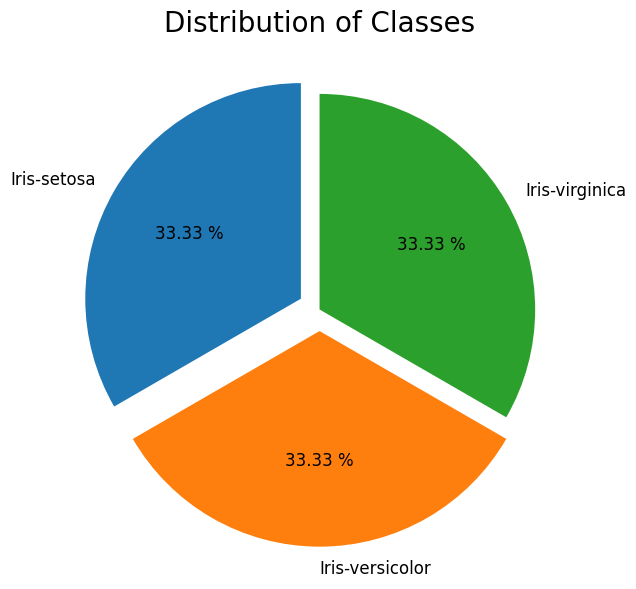

In [ ]:
count_list = [(df.Species == 'Iris-setosa').sum(), (df.Species == 'Iris-versicolor').sum(), (df.Species == 'Iris-virginica').sum()]
label_list = list(df['Species'].unique())
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()

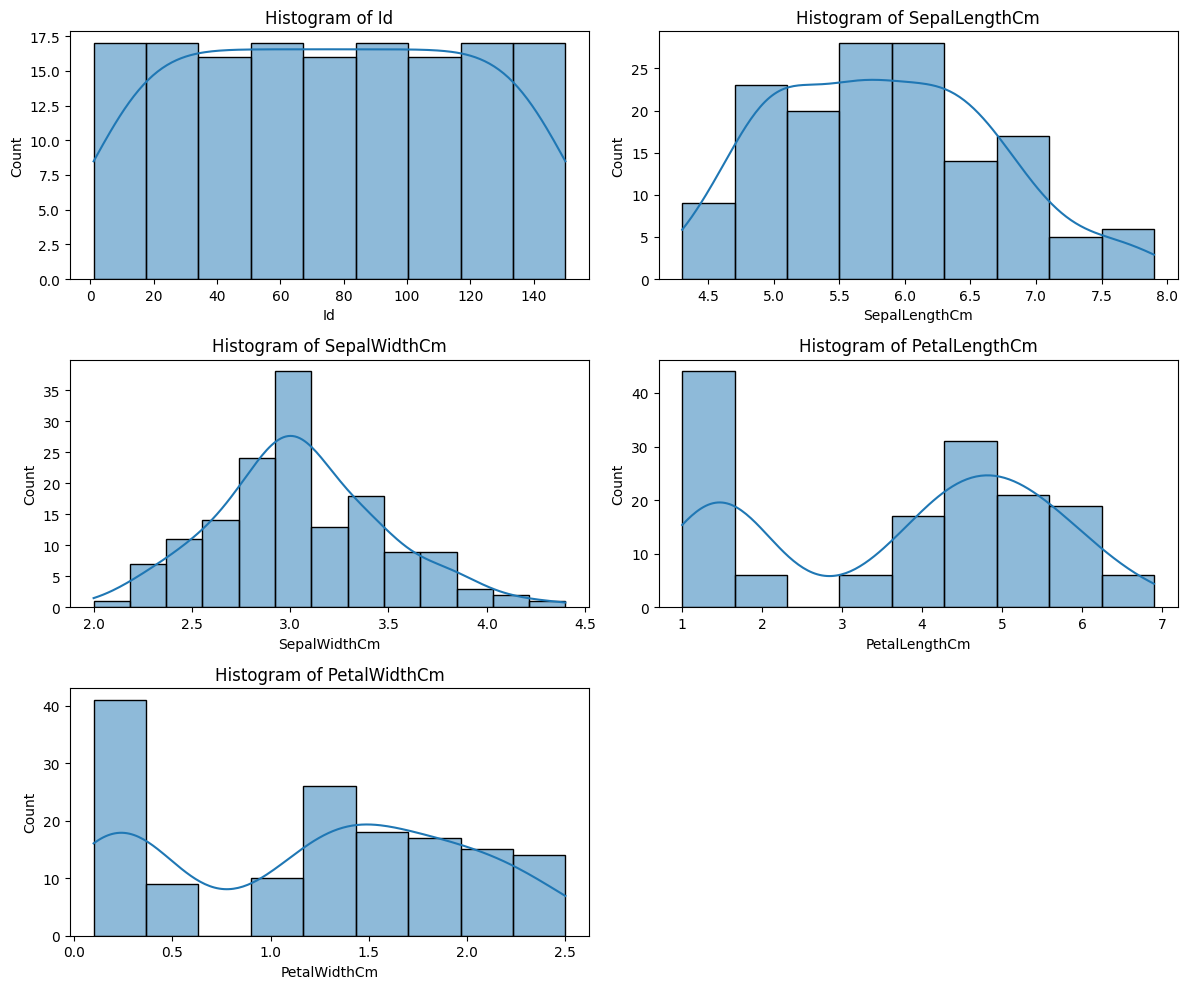

In [ ]:
num_features = len(df.columns) - 1  # Exclude the target column
num_rows = (num_features - 1) // 2 + 1  # Calculate the number of rows for subplots
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

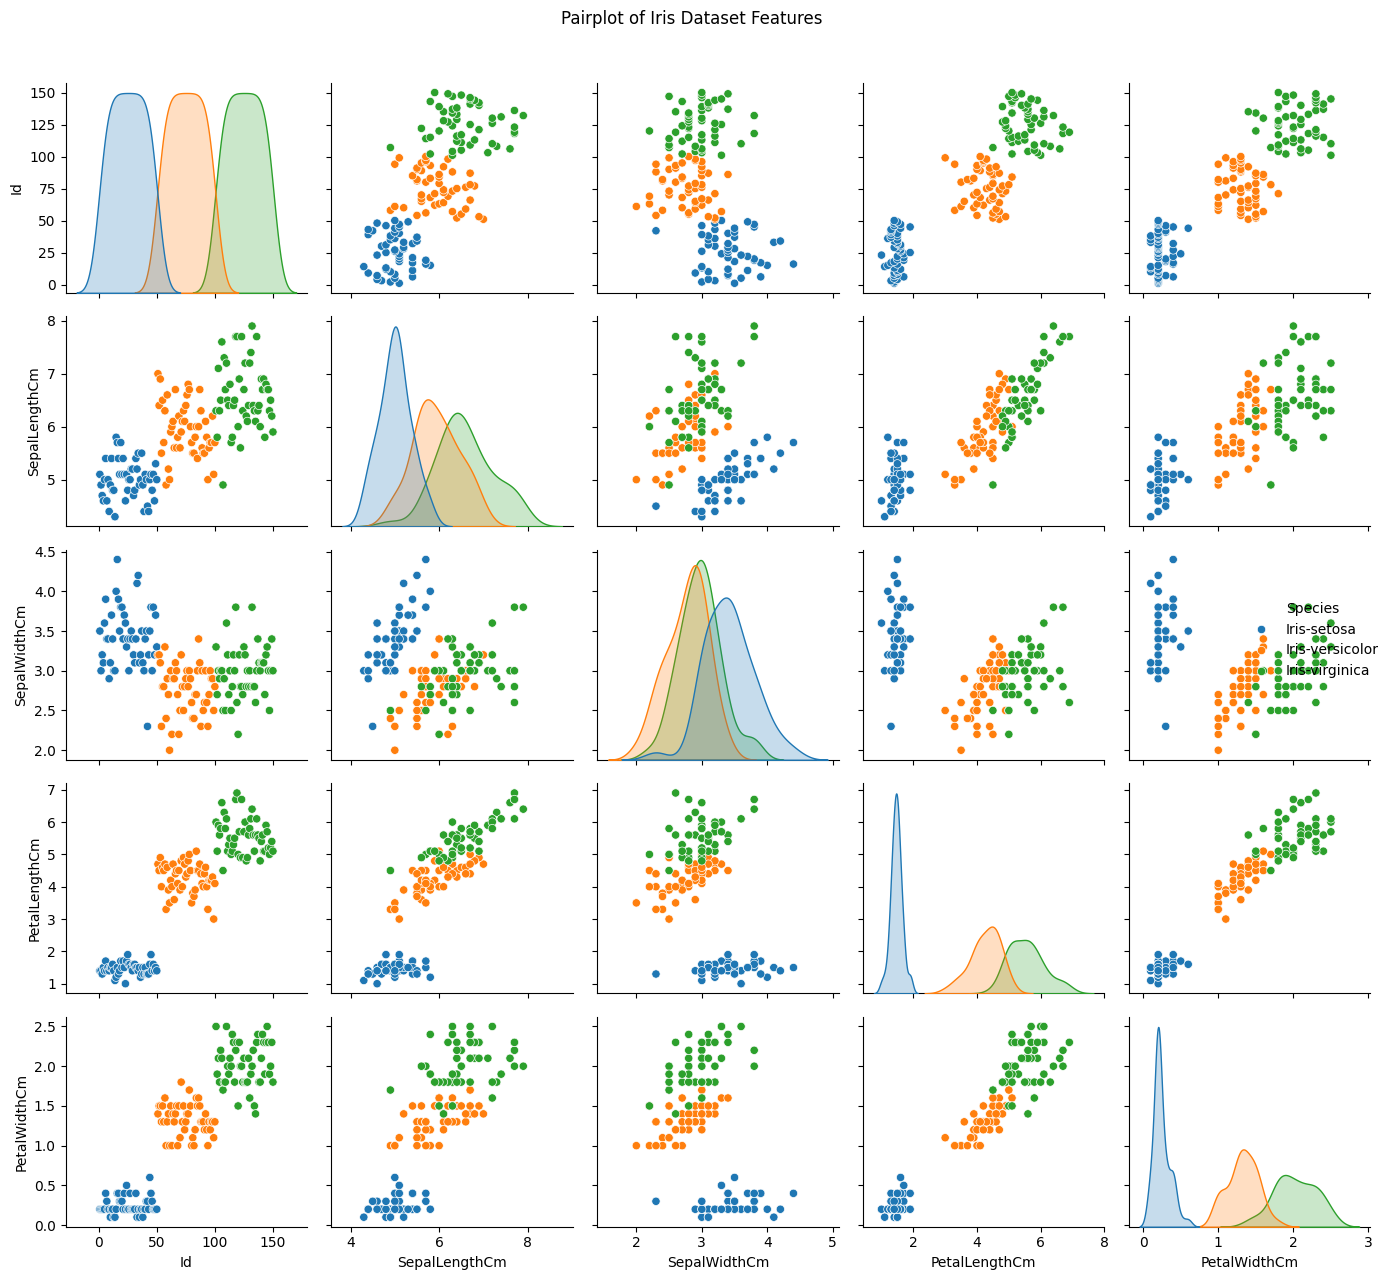

In [ ]:
# Visualize the relationship between numerical features using pairplot
sns.pairplot(df, hue='Species')
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
plt.tight_layout()
plt.show()

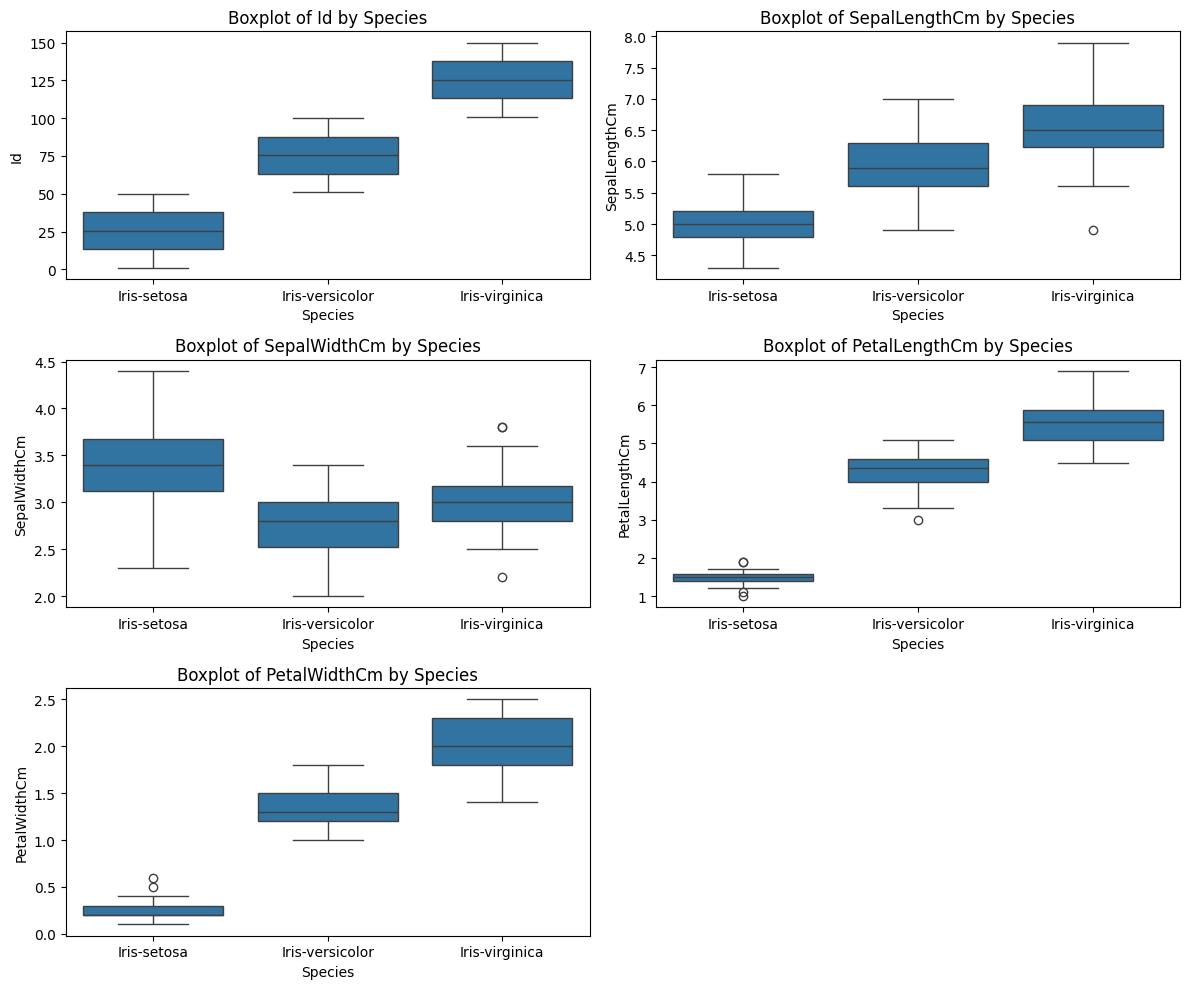

In [ ]:
# Visualize the distribution of each feature by species using boxplots
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(num_rows, 2, i+1)
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Species')
plt.tight_layout()
plt.show()


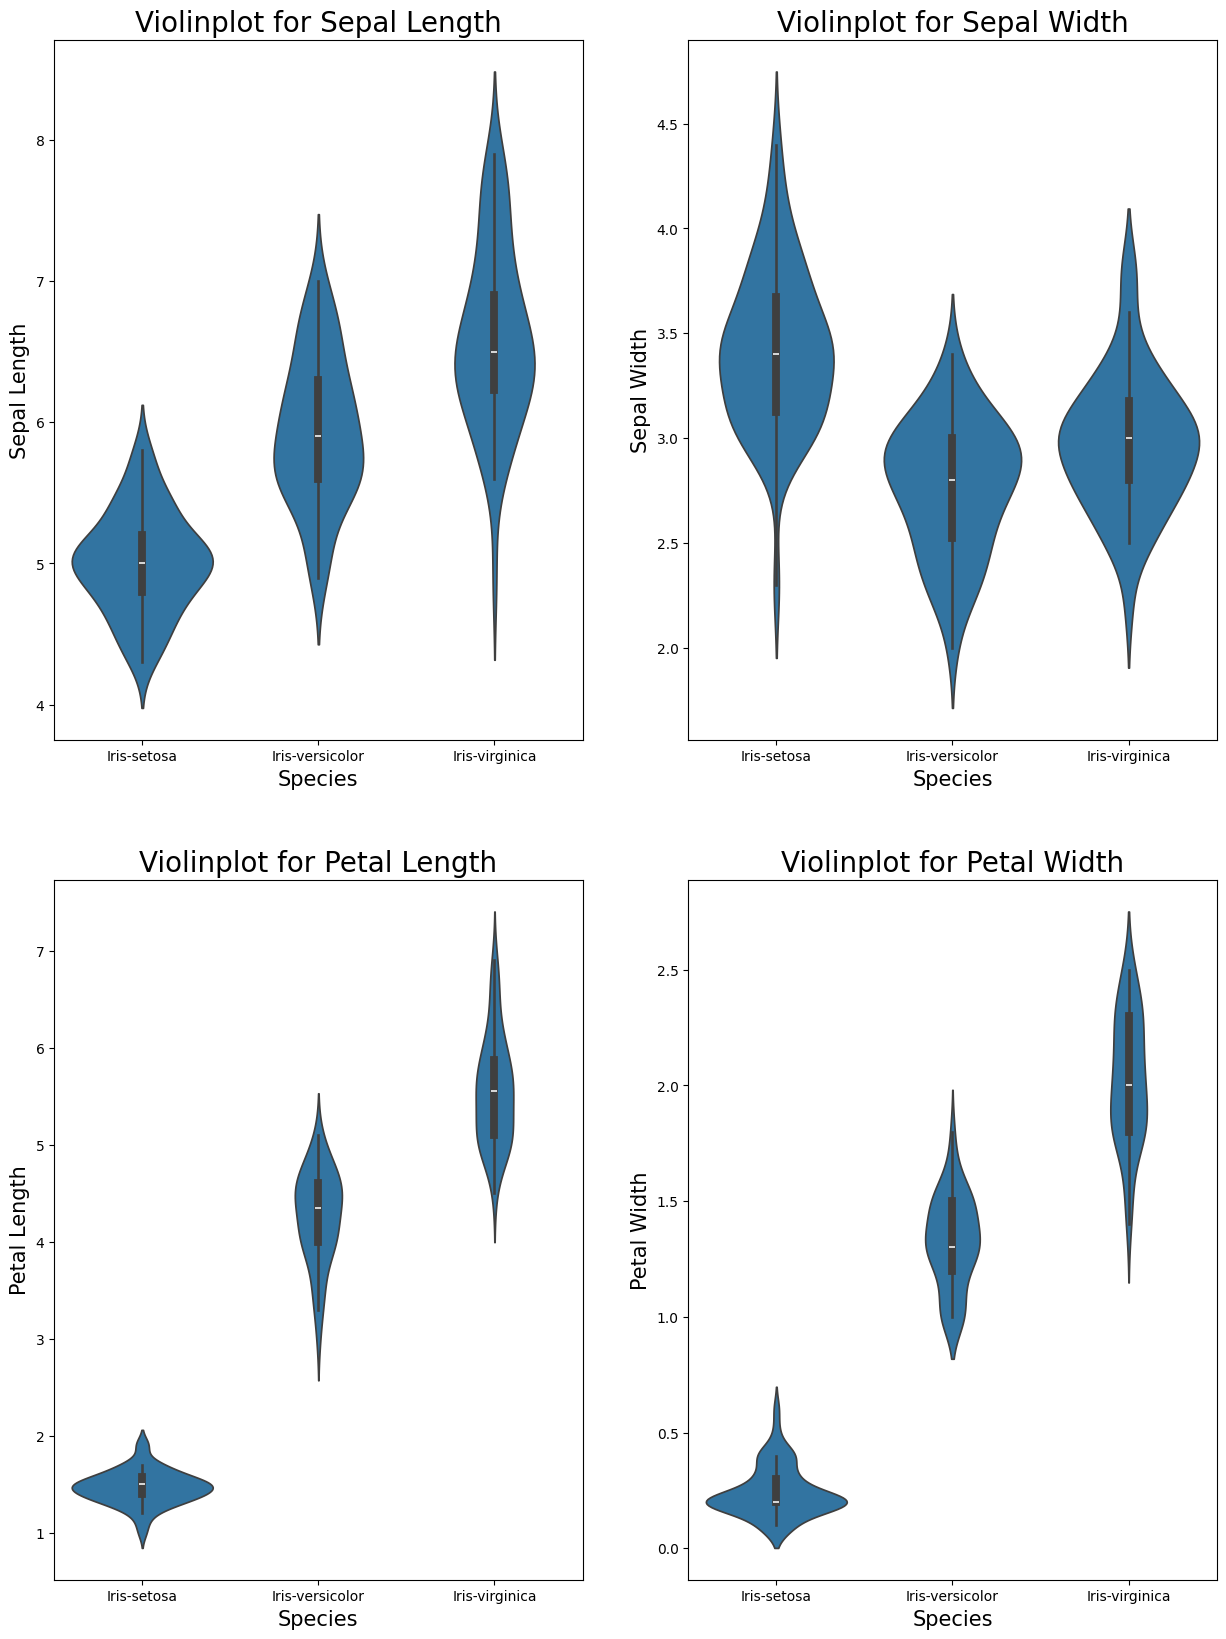

In [ ]:
plt.figure(figsize=(15, 20))

def create_violinplot(feature):
    sns.violinplot(data = df, x = 'Species', y = feature)
    if(feature == 'SepalLengthCm'):
        feature = 'Sepal Length'
    if(feature == 'SepalWidthCm'):
        feature = 'Sepal Width'
    if(feature == 'PetalLengthCm'):
        feature = 'Petal Length'
    if(feature == 'PetalWidthCm'):
        feature = 'Petal Width'
    plt.title('Violinplot for ' + feature, fontsize = 20)
    plt.xlabel('Species', fontsize = 15)
    plt.ylabel(feature, fontsize = 15)

plt.subplot(221)
create_violinplot('SepalLengthCm')

plt.subplot(222)
create_violinplot('SepalWidthCm')
plt.subplot(223)
create_violinplot('PetalLengthCm')

plt.subplot(224)
create_violinplot('PetalWidthCm')

plt.show()

<ipython-input-19-9a5f90c07112>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)


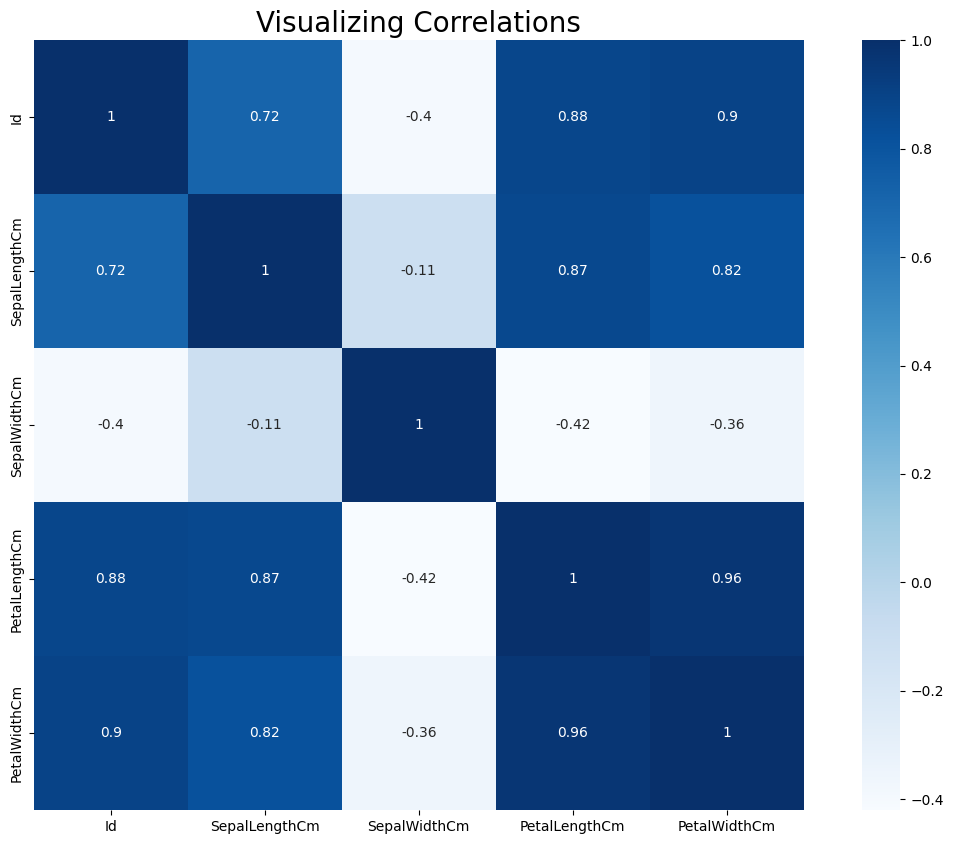

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

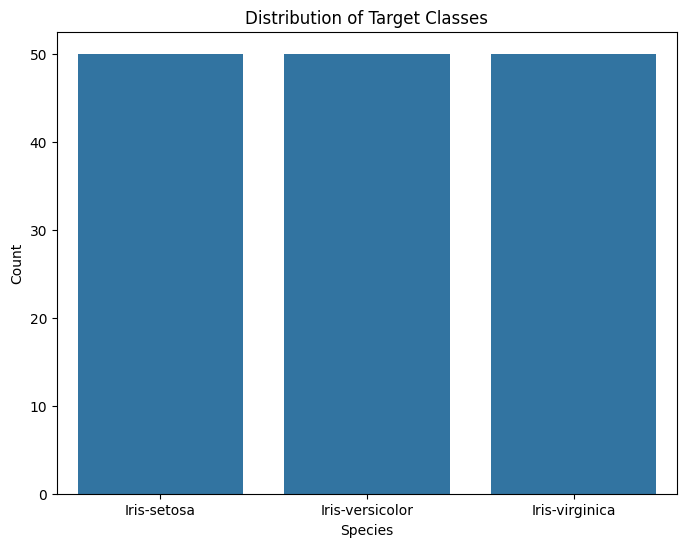

In [ ]:

# Bar Plot of Target Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=df)
plt.title('Distribution of Target Classes')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()
